Q1. Consider the “Academic performance” dataset of students (Academic_Performance_Dataset.csv) and perform the following
operations using Python.
a) Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
b) Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
c) Apply data transformations on categorical variables to convert it into numerical variables.
Reason and document your approach properly.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Academic_Performance.csv')

In [3]:
df

,STUDENT ID,GENDER,PLACEMENT,HONOR OPTED OR NOT,EDUCATION TYPE,ACADEMIC PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,SB11201420568705,M,Yes,Yes,ACADEMIC,MECHATRONICS ENGINEERING,88.0,71.0,86.0,87.0,65.0,88,FIRST CLASS
12407,SB11201420573045,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,46.0,39.0,44.0,11.0,0.0,4,FIRST CLASS
12408,SB11201420578809,M,Yes,No,ACADEMIC,INDUSTRIAL ENGINEERING,98.0,88.0,90.0,81.0,87.0,95,FIRST CLASS
12409,SB11201420578812,F,Yes,Yes,ACADEMIC,NaN,60.0,80.0,51.0,8.0,42.0,50,FIRST CLASS


In [4]:
df.describe()

,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE
count,12400.000000,12403.000000,12397.000000,12397.000000,12389.000000,12411.000000
mean,77.385887,62.191728,59.189562,67.501815,53.690532,68.446459
std,22.716227,27.669357,29.002446,25.505280,30.007993,25.867550
min,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,65.000000,42.000000,36.000000,51.000000,28.000000,51.000000
50%,85.000000,67.000000,65.000000,74.000000,56.000000,75.000000
75%,96.000000,86.000000,85.000000,88.000000,80.000000,90.000000
max,100.000000,100.000000,122.000000,111.000000,107.000000,100.000000


In [5]:
df.dtypes

STUDENT ID             object
GENDER                 object
PLACEMENT              object
HONOR OPTED OR NOT     object
EDUCATION TYPE         object
ACADEMIC PROGRAM       object
COURSE 1 MARKS        float64
COURSE 2 MARKS        float64
COURSE 3 MARKS        float64
COURSE 4 MARKS        float64
COURSE 5 MARKS        float64
PERCENTILE              int64
OVEARLL GRADE          object
dtype: object

In [6]:
df.isnull().sum()

STUDENT ID             0
GENDER                22
PLACEMENT             15
HONOR OPTED OR NOT    14
EDUCATION TYPE        15
ACADEMIC PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL GRADE          0
dtype: int64

In [7]:
df.nunique()

STUDENT ID            12411
GENDER                    2
PLACEMENT                 2
HONOR OPTED OR NOT        2
EDUCATION TYPE            4
ACADEMIC PROGRAM         21
COURSE 1 MARKS          101
COURSE 2 MARKS          100
COURSE 3 MARKS          105
COURSE 4 MARKS          102
COURSE 5 MARKS          102
PERCENTILE              100
OVEARLL GRADE             4
dtype: int64

In [8]:
df_percent=100*df.isnull().sum()/len(df)

In [9]:
df_percent

STUDENT ID            0.000000
GENDER                0.177262
PLACEMENT             0.120861
HONOR OPTED OR NOT    0.112803
EDUCATION TYPE        0.120861
ACADEMIC PROGRAM      0.273951
COURSE 1 MARKS        0.088631
COURSE 2 MARKS        0.064459
COURSE 3 MARKS        0.112803
COURSE 4 MARKS        0.112803
COURSE 5 MARKS        0.177262
PERCENTILE            0.000000
OVEARLL GRADE         0.000000
dtype: float64

The Column 'COURSE 1 MARKS' has a negative value. The value may be nagative by mistake. Hence we take the absolute value.

In [10]:
df['COURSE 1 MARKS']=df['COURSE 1 MARKS'].abs()        

The Column "STUDENT_ID" Contains Nominal Data. These categories cannot be ordered in a meaningful way. Therefore we can drop it.

In [11]:
df.drop(['STUDENT ID'], axis=1, inplace=True)

In [12]:
df

,GENDER,PLACEMENT,HONOR OPTED OR NOT,EDUCATION TYPE,ACADEMIC PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL GRADE
0,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS
...,...,...,...,...,...,...,...,...,...,...,...,...
12406,M,Yes,Yes,ACADEMIC,MECHATRONICS ENGINEERING,88.0,71.0,86.0,87.0,65.0,88,FIRST CLASS
12407,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,46.0,39.0,44.0,11.0,0.0,4,FIRST CLASS
12408,M,Yes,No,ACADEMIC,INDUSTRIAL ENGINEERING,98.0,88.0,90.0,81.0,87.0,95,FIRST CLASS
12409,F,Yes,Yes,ACADEMIC,NaN,60.0,80.0,51.0,8.0,42.0,50,FIRST CLASS


There are many NaN values in the dataframe. We need to remove the same. We can replace with mean value or an arbitary value.In case of Course Marks we can replace all NaN values with arbitary value '0' using fillna().

In [13]:
df['COURSE 1 MARKS']=df['COURSE 1 MARKS'].fillna(0)

In [14]:
df['COURSE 2 MARKS']=df['COURSE 2 MARKS'].replace(np.NaN, df['COURSE 2 MARKS'].mean())

In [15]:
df['COURSE 3 MARKS']=df['COURSE 3 MARKS'].fillna(0)

In [16]:
df['COURSE 4 MARKS']=df['COURSE 4 MARKS'].fillna(0)

In [17]:
df['COURSE 5 MARKS']=df['COURSE 5 MARKS'].fillna(0)

In [18]:
df.isnull().sum()

GENDER                22
PLACEMENT             15
HONOR OPTED OR NOT    14
EDUCATION TYPE        15
ACADEMIC PROGRAM      34
COURSE 1 MARKS         0
COURSE 2 MARKS         0
COURSE 3 MARKS         0
COURSE 4 MARKS         0
COURSE 5 MARKS         0
PERCENTILE             0
OVEARLL GRADE          0
dtype: int64

There are many NaN values in the dataframe that will cause redundancy. We need to remove the same. We can replace with mean value or an arbitary value. Replacing NaN values with Mostly occuring in columns 'HONOR OPTED OR NOT', 'EDUCATION TYPE' and 'ACADEMIC PROGRAM'.

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [21]:
df['HONOR OPTED OR NOT']=imputer.fit_transform(df['HONOR OPTED OR NOT'].values.reshape(-1,1))[:,0]

In [22]:
df['EDUCATION TYPE']=imputer.fit_transform(df['EDUCATION TYPE'].values.reshape(-1,1))[:,0]

In [23]:
df['ACADEMIC PROGRAM']=imputer.fit_transform(df['ACADEMIC PROGRAM'].values.reshape(-1,1))[:,0]

In [24]:
df

,GENDER,PLACEMENT,HONOR OPTED OR NOT,EDUCATION TYPE,ACADEMIC PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL GRADE
0,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS
...,...,...,...,...,...,...,...,...,...,...,...,...
12406,M,Yes,Yes,ACADEMIC,MECHATRONICS ENGINEERING,88.0,71.0,86.0,87.0,65.0,88,FIRST CLASS
12407,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,46.0,39.0,44.0,11.0,0.0,4,FIRST CLASS
12408,M,Yes,No,ACADEMIC,INDUSTRIAL ENGINEERING,98.0,88.0,90.0,81.0,87.0,95,FIRST CLASS
12409,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,60.0,80.0,51.0,8.0,42.0,50,FIRST CLASS


In [25]:
df.isnull().sum()

GENDER                22
PLACEMENT             15
HONOR OPTED OR NOT     0
EDUCATION TYPE         0
ACADEMIC PROGRAM       0
COURSE 1 MARKS         0
COURSE 2 MARKS         0
COURSE 3 MARKS         0
COURSE 4 MARKS         0
COURSE 5 MARKS         0
PERCENTILE             0
OVEARLL GRADE          0
dtype: int64

Some NaN values such as of the column 'Gender' do not make sense in being replaced with an arbitary value or a constant. Such rows are to be dropped.

In [26]:
df.dropna(subset=['GENDER'],inplace=True)

In [27]:
df.dropna(subset=['PLACEMENT'],inplace=True)

In [28]:
df.isnull().sum()

GENDER                0
PLACEMENT             0
HONOR OPTED OR NOT    0
EDUCATION TYPE        0
ACADEMIC PROGRAM      0
COURSE 1 MARKS        0
COURSE 2 MARKS        0
COURSE 3 MARKS        0
COURSE 4 MARKS        0
COURSE 5 MARKS        0
PERCENTILE            0
OVEARLL GRADE         0
dtype: int64

Visualization of Data

In [29]:
import seaborn as sns

The below bar graph shows the relation between placement and percentile. Sligthly higher percentile students are more tended to be placed.

<AxesSubplot:xlabel='PLACEMENT', ylabel='PERCENTILE'>

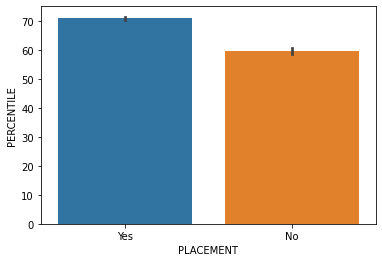

In [30]:
sns.barplot(x='PLACEMENT',y='PERCENTILE',data=df)

The below plot is a histogram of Course 1 Marks. As seen below marks 100 is obtained by almost more than 2000 students. The graph shows the frequency of students course 1 marks.

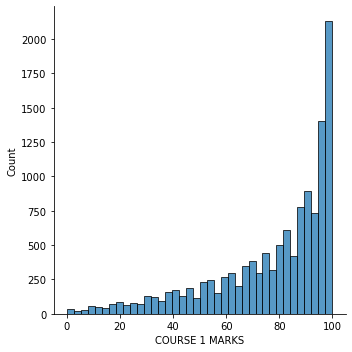

In [31]:
sns.displot(df['COURSE 1 MARKS']) 

The below plot is a strip plot with 'EDUCATION TYPE' and 'PERCENTILE' as its parameters and hue as 'GENDER'. This plot gives the understanding of how many students were of a certain 'Education type' and what was their percentile with the seperation of gender. 

The below plot is a boxplot. The square shows the region where most of the students scored marks. The region lies between 40 and 90.

<AxesSubplot:xlabel='COURSE 2 MARKS'>

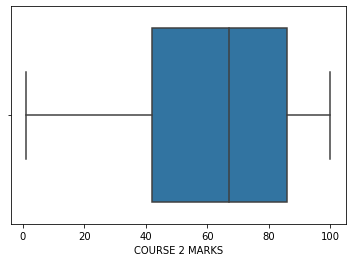

In [32]:
sns.boxplot(data=df['COURSE 2 MARKS'],x=df['COURSE 2 MARKS'])

The below plot is a boxplot. The square shows the region where most of the students scored marks. The region lies between 25 and 80.

<AxesSubplot:xlabel='COURSE 4 MARKS'>

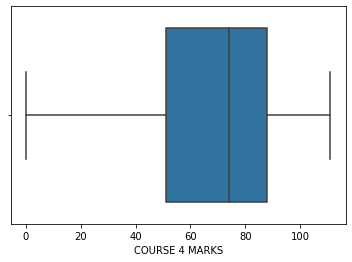

In [33]:
sns.boxplot(data=df['COURSE 4 MARKS'],x=df['COURSE 4 MARKS'])

<AxesSubplot:xlabel='COURSE 1 MARKS'>

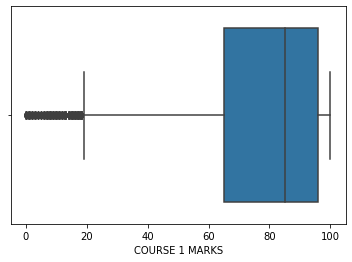

In [34]:
sns.boxplot(data=df['COURSE 1 MARKS'],x=df['COURSE 1 MARKS'])

The above Boxplot has many outliers shown in dots. These Outliers are to be minimized. The below Code is used to remove the outliers using quantiles.
Outliers can be identified using Zscore test and IQR.

Outlier detection using IQR

In [35]:
outliers = []
def detect_outliers_zscore(data):
    thres = 2.7
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
marks_outliers = detect_outliers_zscore(df['COURSE 1 MARKS'])
print("Outliers from Z-scores method: ", marks_outliers)

Outliers from Z-scores method:  [13.0, 15.0, 0.0, 0.0, 12.0, 6.0, 3.0, 0.0, 11.0, 0.0, 0.0, 1.0, 0.0, 5.0, 0.0, 10.0, 15.0, 0.0, 13.0, 12.0, 14.0, 2.0, 8.0, 13.0, 10.0, 7.0, 12.0, 13.0, 2.0, 14.0, 11.0, 11.0, 8.0, 6.0, 15.0, 9.0, 2.0, 9.0, 15.0, 11.0, 8.0, 1.0, 9.0, 2.0, 13.0, 13.0, 2.0, 14.0, 1.0, 6.0, 11.0, 10.0, 13.0, 7.0, 4.0, 13.0, 5.0, 9.0, 11.0, 7.0, 9.0, 12.0, 1.0, 11.0, 2.0, 10.0, 8.0, 14.0, 5.0, 2.0, 12.0, 11.0, 14.0, 13.0, 8.0, 11.0, 15.0, 8.0, 13.0, 1.0, 4.0, 7.0, 4.0, 7.0, 14.0, 8.0, 3.0, 8.0, 5.0, 15.0, 9.0, 14.0, 7.0, 11.0, 8.0, 10.0, 14.0, 7.0, 0.0, 14.0, 1.0, 15.0, 11.0, 14.0, 9.0, 15.0, 15.0, 11.0, 2.0, 12.0, 12.0, 10.0, 7.0, 10.0, 5.0, 3.0, 7.0, 10.0, 13.0, 15.0, 12.0, 14.0, 3.0, 8.0, 6.0, 9.0, 10.0, 13.0, 15.0, 8.0, 9.0, 6.0, 1.0, 7.0, 8.0, 1.0, 13.0, 9.0, 1.0, 13.0, 7.0, 15.0, 8.0, 9.0, 15.0, 15.0, 10.0, 6.0, 11.0, 15.0, 13.0, 10.0, 7.0, 7.0, 14.0, 8.0, 4.0, 14.0, 6.0, 12.0, 15.0, 14.0, 6.0, 5.0, 13.0, 12.0, 1.0, 8.0, 8.0, 15.0, 3.0, 1.0, 3.0, 10.0, 3.0, 15.0, 2.0,

Outlier detection using IQR

In [36]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
marks_outliers = detect_outliers_iqr(df['COURSE 1 MARKS'])
print("Outliers from IQR method: ", marks_outliers)

Outliers from IQR method:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13

In [37]:
Q1=df['COURSE 1 MARKS'].quantile(0.25)
Q3=df['COURSE 1 MARKS'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

65.0
96.0
31.0
18.5 142.5


In [38]:
df = df[df['COURSE 1 MARKS']< Upper_Whisker]

In [39]:
df.describe()

,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE
count,12374.000000,12374.000000,12374.000000,12374.000000,12374.000000,12374.000000
mean,77.332795,62.187452,59.130273,67.440925,53.594715,68.448844
std,22.807247,27.660639,29.048200,25.559787,30.060472,25.865950
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,65.000000,42.000000,35.000000,51.000000,28.000000,51.000000
50%,85.000000,67.000000,65.000000,74.000000,56.000000,75.000000
75%,96.000000,86.000000,85.000000,88.000000,80.000000,90.000000
max,100.000000,100.000000,122.000000,111.000000,100.000000,100.000000


In [40]:
df

,GENDER,PLACEMENT,HONOR OPTED OR NOT,EDUCATION TYPE,ACADEMIC PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL GRADE
0,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS
...,...,...,...,...,...,...,...,...,...,...,...,...
12406,M,Yes,Yes,ACADEMIC,MECHATRONICS ENGINEERING,88.0,71.0,86.0,87.0,65.0,88,FIRST CLASS
12407,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,46.0,39.0,44.0,11.0,0.0,4,FIRST CLASS
12408,M,Yes,No,ACADEMIC,INDUSTRIAL ENGINEERING,98.0,88.0,90.0,81.0,87.0,95,FIRST CLASS
12409,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,60.0,80.0,51.0,8.0,42.0,50,FIRST CLASS


The columns 'GENDER', 'PLACEMENT' and 'HONOR OPTED OR NOT' are having categorical data. It is difficult to preprocess a categorical data. Hence we need to convert the same.  In gender, The attiributes are 'F' and'M'. We need to change it to 0 and 1 respectively. Similarly for the coulumns 'Placement' and 'HONOR OPTED OR NOT'. Since having only 2 unique values it is easy to manually change them. For large set of values we should use label Encoding.

In [41]:
df['GENDER'].unique()

array(['F', 'M'], dtype=object)

In [42]:
df['PLACEMENT'].unique()

array(['Yes', 'No'], dtype=object)

In [43]:
df['HONOR OPTED OR NOT'].unique()

array(['Yes', 'No'], dtype=object)

In [44]:
df.GENDER.replace({"F":0, "M":1}, inplace= True)

In [45]:
df.PLACEMENT.replace({"Yes":0, "No":1}, inplace= True)

In [46]:
df['HONOR OPTED OR NOT'].replace({"Yes":0, "No":1}, inplace= True)

In [47]:
df

,GENDER,PLACEMENT,HONOR OPTED OR NOT,EDUCATION TYPE,ACADEMIC PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL GRADE
0,0,0,0,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,0,0,0,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,1,1,0,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,0,0,0,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,1,0,0,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS
...,...,...,...,...,...,...,...,...,...,...,...,...
12406,1,0,0,ACADEMIC,MECHATRONICS ENGINEERING,88.0,71.0,86.0,87.0,65.0,88,FIRST CLASS
12407,1,0,0,ACADEMIC,INDUSTRIAL ENGINEERING,46.0,39.0,44.0,11.0,0.0,4,FIRST CLASS
12408,1,0,1,ACADEMIC,INDUSTRIAL ENGINEERING,98.0,88.0,90.0,81.0,87.0,95,FIRST CLASS
12409,0,0,0,ACADEMIC,INDUSTRIAL ENGINEERING,60.0,80.0,51.0,8.0,42.0,50,FIRST CLASS


Encoding is necessary for Categorical data. The column values of 'EDUCATION TYPE', 'ACADEMIC PROGRAM'and 'OVEARLL GRADE' is changed into numerical data for better understanding and preprocessing. In this case, Label Encoder is used.

In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [49]:
l1=LabelEncoder()

In [50]:
df['EDUCATION TYPE']= l1.fit_transform(df['EDUCATION TYPE'])

In [51]:
df['ACADEMIC PROGRAM']= l1.fit_transform(df['ACADEMIC PROGRAM'])

In [52]:
df['OVEARLL GRADE']= l1.fit_transform(df['OVEARLL GRADE'])

In [53]:
df

,GENDER,PLACEMENT,HONOR OPTED OR NOT,EDUCATION TYPE,ACADEMIC PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL GRADE
0,0,0,0,0,13,71.0,93.0,71.0,93.0,79.0,91,1
1,0,0,0,0,13,97.0,38.0,86.0,98.0,78.0,92,3
2,1,1,0,0,10,17.0,1.0,18.0,43.0,22.0,7,0
3,0,0,0,0,13,65.0,35.0,76.0,80.0,48.0,67,1
4,1,0,0,0,13,94.0,94.0,98.0,100.0,71.0,98,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12406,1,0,0,0,15,88.0,71.0,86.0,87.0,65.0,88,1
12407,1,0,0,0,13,46.0,39.0,44.0,11.0,0.0,4,1
12408,1,0,1,0,13,98.0,88.0,90.0,81.0,87.0,95,1
12409,0,0,0,0,13,60.0,80.0,51.0,8.0,42.0,50,1


The label Encoded data can be further into number of columns. On performing One Hot Encoding, GENDER is Split into two columns as 'GENDER_0' and 'GENDER_1'. Similarly, the column'HONOR OPTED OR NOT' is split into 'HONOR OPTED OR NOT_0' and 'HONOR OPTED OR NOT_1'

In [54]:
ohe=OneHotEncoder()

In [55]:
ohe = pd.get_dummies(df, columns = ['GENDER', 'HONOR OPTED OR NOT'])

In [56]:
ohe

,PLACEMENT,EDUCATION TYPE,ACADEMIC PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL GRADE,GENDER_0,GENDER_1,HONOR OPTED OR NOT_0,HONOR OPTED OR NOT_1
0,0,0,13,71.0,93.0,71.0,93.0,79.0,91,1,1,0,1,0
1,0,0,13,97.0,38.0,86.0,98.0,78.0,92,3,1,0,1,0
2,1,0,10,17.0,1.0,18.0,43.0,22.0,7,0,0,1,1,0
3,0,0,13,65.0,35.0,76.0,80.0,48.0,67,1,1,0,1,0
4,0,0,13,94.0,94.0,98.0,100.0,71.0,98,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,0,0,15,88.0,71.0,86.0,87.0,65.0,88,1,0,1,1,0
12407,0,0,13,46.0,39.0,44.0,11.0,0.0,4,1,0,1,1,0
12408,0,0,13,98.0,88.0,90.0,81.0,87.0,95,1,0,1,0,1
12409,0,0,13,60.0,80.0,51.0,8.0,42.0,50,1,1,0,1,0
